In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
coordinates[0]

(-16.096884576187776, -86.73308366533337)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [14]:
cities[0]

'hualmay'

In [15]:
# Create an empty list to hold the weather data.
city_data = []

# Define api url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hualmay
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | saint-augustin
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ilheus
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | nuevo progreso
Processing Record 17 of Set 1 | omsukchan
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | padang

Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | tahe
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | uruzgan
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | harnai
Processing Record 47 of Set 4 | aswan
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | high level
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | tysmenytsya
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | san policarpo
Processing Record 5 of Set 5 | nuuk
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | okhotsk
Processing Record 8 of Set 5 | praya
Processing Record 9 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 10 of Set 5 | acapulco
Processing Record 11 of Set 5 | guerrero n

Processing Record 32 of Set 8 | nemuro
Processing Record 33 of Set 8 | torbay
Processing Record 34 of Set 8 | gorontalo
Processing Record 35 of Set 8 | belmonte
Processing Record 36 of Set 8 | litovko
Processing Record 37 of Set 8 | virginia beach
Processing Record 38 of Set 8 | washington
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | ayaviri
Processing Record 41 of Set 8 | bayburt
Processing Record 42 of Set 8 | barra do corda
Processing Record 43 of Set 8 | raudeberg
Processing Record 44 of Set 8 | chornukhy
Processing Record 45 of Set 8 | kishangarh
Processing Record 46 of Set 8 | dali
Processing Record 47 of Set 8 | inongo
Processing Record 48 of Set 8 | parole
Processing Record 49 of Set 8 | lolua
City not found. Skipping...
Processing Record 50 of Set 8 | sakaiminato
Processing Record 1 of Set 9 | ballina
Processing Record 2 of Set 9 | vao
Processing Record 3 of Set 9 | safita
Processing Record 4 of Set 9 | dzilam gonzalez
Processing Record 5 of Set 9 | na

Processing Record 22 of Set 12 | bombay
Processing Record 23 of Set 12 | chapais
Processing Record 24 of Set 12 | teacapan
Processing Record 25 of Set 12 | richards bay
Processing Record 26 of Set 12 | ismailia
Processing Record 27 of Set 12 | manica
Processing Record 28 of Set 12 | cairo
Processing Record 29 of Set 12 | havre-saint-pierre
Processing Record 30 of Set 12 | trairi
Processing Record 31 of Set 12 | dmitriyevka
Processing Record 32 of Set 12 | zyryanka
Processing Record 33 of Set 12 | hays
Processing Record 34 of Set 12 | tanete
Processing Record 35 of Set 12 | lasa
Processing Record 36 of Set 12 | kerema
Processing Record 37 of Set 12 | catamarca
Processing Record 38 of Set 12 | thessalon
Processing Record 39 of Set 12 | ouagadougou
Processing Record 40 of Set 12 | puerto penasco
Processing Record 41 of Set 12 | sur
Processing Record 42 of Set 12 | rania
Processing Record 43 of Set 12 | teguldet
Processing Record 44 of Set 12 | aguadilla
Processing Record 45 of Set 12 | us

In [16]:
len(city_data)

566

In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hualmay,-11.0964,-77.6139,64.54,76,46,11.21,PE,2021-08-14 22:15:57
1,East London,-33.0153,27.9116,58.78,69,100,6.98,ZA,2021-08-14 22:15:57
2,Saint-Augustin,51.2260,-58.6502,67.73,85,34,7.72,CA,2021-08-14 22:15:58
3,Bluff,-46.6000,168.3333,48.79,77,99,20.74,NZ,2021-08-14 22:15:58
4,Norman Wells,65.2820,-126.8329,57.24,72,90,8.05,CA,2021-08-14 22:15:58
5,Rikitea,-23.1203,-134.9692,74.59,82,44,18.90,PF,2021-08-14 22:12:32
6,Kapaa,22.0752,-159.3190,86.32,66,20,4.00,US,2021-08-14 22:15:59
7,Mataura,-46.1927,168.8643,48.47,78,90,5.84,NZ,2021-08-14 22:15:59
8,Ponta Do Sol,32.6667,-17.1000,78.71,69,43,1.88,PT,2021-08-14 22:16:00
9,Punta Arenas,-53.1500,-70.9167,39.31,100,90,6.91,CL,2021-08-14 22:16:00


In [18]:
# Rearrange the columns
new_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hualmay,PE,2021-08-14 22:15:57,-11.0964,-77.6139,64.54,76,46,11.21
1,East London,ZA,2021-08-14 22:15:57,-33.0153,27.9116,58.78,69,100,6.98
2,Saint-Augustin,CA,2021-08-14 22:15:58,51.2260,-58.6502,67.73,85,34,7.72
3,Bluff,NZ,2021-08-14 22:15:58,-46.6000,168.3333,48.79,77,99,20.74
4,Norman Wells,CA,2021-08-14 22:15:58,65.2820,-126.8329,57.24,72,90,8.05
5,Rikitea,PF,2021-08-14 22:12:32,-23.1203,-134.9692,74.59,82,44,18.90
6,Kapaa,US,2021-08-14 22:15:59,22.0752,-159.3190,86.32,66,20,4.00
7,Mataura,NZ,2021-08-14 22:15:59,-46.1927,168.8643,48.47,78,90,5.84
8,Ponta Do Sol,PT,2021-08-14 22:16:00,32.6667,-17.1000,78.71,69,43,1.88
9,Punta Arenas,CL,2021-08-14 22:16:00,-53.1500,-70.9167,39.31,100,90,6.91


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628981545.4052427

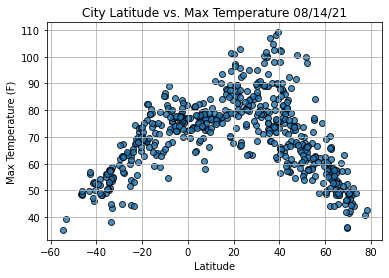

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()